In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

![截圖 2025-09-23 下午2.51.06.png](<attachment:截圖 2025-09-23 下午2.51.06.png>)
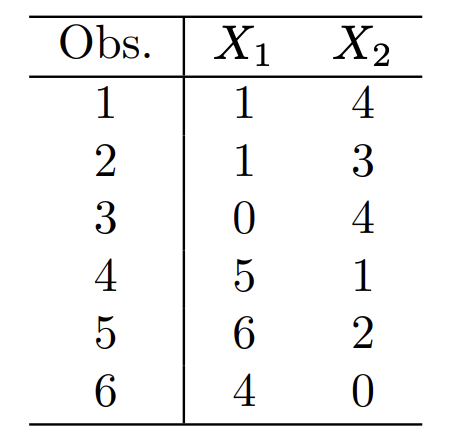

import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(a) Plot the observations.

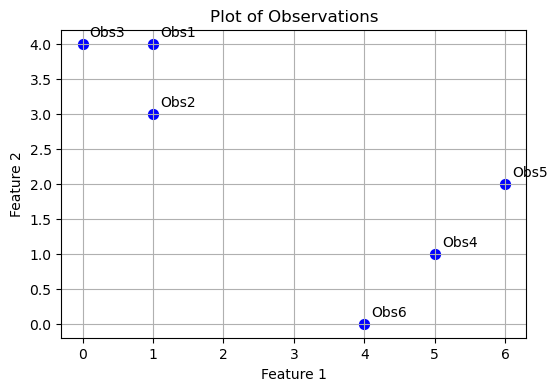

In [4]:
X = np.array([[1, 4],
              [1, 3],
              [0, 4],
              [5, 1],
              [6, 2],
              [4, 0]])

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50)
for i, (x, y) in enumerate(X, start=1):
    plt.text(x+0.1, y+0.1, f"Obs{i}")  # 標上觀測值編號
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of Observations")
plt.grid(True)
plt.show()

(b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [5]:
# 假設有 6 個觀測值
n = 6
K = 2  # 兩個群

# 隨機分配 cluster 標籤 (1 或 2)
np.random.seed(42)  # 固定隨機種子，方便重現
cluster_labels = np.random.choice([1, 2], size=n)

# 印出結果
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Cluster {label}")

Observation 1: Cluster 1
Observation 2: Cluster 2
Observation 3: Cluster 1
Observation 4: Cluster 1
Observation 5: Cluster 1
Observation 6: Cluster 2


(c) Compute the centroid for each cluster.

In [14]:
# 計算每個 cluster 的 centroid
centroids = np.zeros((K, X.shape[1]))  # 每列是一個 centroid
for k in range(1, K+1):
    centroids[k-1] = X[cluster_labels == k].mean(axis=0)

# 印出每個 centroid
for k, centroid in enumerate(centroids, start=1):
    print(f"Centroid of Cluster {k}: {centroid}")

Centroid of Cluster 1: [3.   2.75]
Centroid of Cluster 2: [2.5 1.5]


(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [18]:
# 計算每個觀測值到每個 centroid 的歐式距離
# 並分配到距離最近的 centroid
labels = np.zeros(X.shape[0], dtype=int)
for i, x in enumerate(X):
    distances = np.linalg.norm(x - centroids, axis=1)  # 每個 centroid 的距離
    labels[i] = np.argmin(distances) + 1          # cluster 編號從 1 開始

# 印出結果
for i, label in enumerate(labels, start=1):
    print(f"Observation {i}: Cluster {label}")

Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 1
Observation 6: Cluster 2


(e) Repeat (c) and (d) until the answers obtained stop changing.

In [21]:
while True:

    # 計算每個 cluster 的 centroid
    centroids = np.zeros((K, X.shape[1]))
    for k in range(1, K+1):
        centroids[k-1] = X[labels == k].mean(axis=0)
    print("Centroids:\n", centroids)

    # 分配每個觀測值到距離最近的 centroid
    new_labels = np.zeros(n, dtype=int)
    for i, x in enumerate(X):
        distances = np.linalg.norm(x - centroids, axis=1)
        new_labels[i] = np.argmin(distances) + 1

    print("Updated cluster labels:", new_labels)

    # 如果 labels 沒有變化，就停止迴圈
    if np.array_equal(labels, new_labels):
        print("finished")
        for i, label in enumerate(labels, start=1):
            print(f"Observation {i}: Cluster {label}")
        break
    else:
        labels = new_labels 

Centroids:
 [[0.66666667 3.66666667]
 [5.         1.        ]]
Updated cluster labels: [1 1 1 2 2 2]
finished
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 2
Observation 6: Cluster 2


(f) In your plot from (a), color the observations according to the cluster labels obtained.

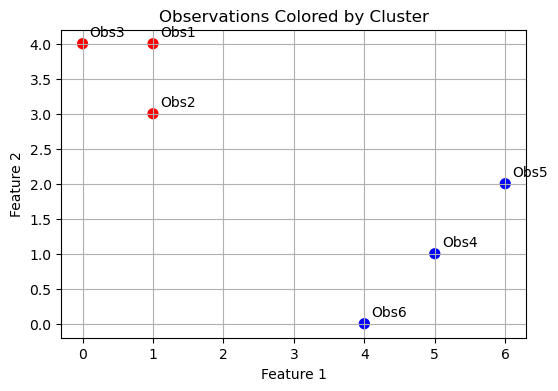

In [22]:
# 定義顏色對應 cluster
colors = ['red' if label==1 else 'blue' for label in labels]

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50)
for i, (x, y) in enumerate(X, start=1):
    plt.text(x+0.1, y+0.1, f"Obs{i}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Observations Colored by Cluster")
plt.grid(True)
plt.show()